In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv('vehicles_prep.csv')
df.head()


<ipython-input-2-3d8fbed8074b>:1: DtypeWarning: Columns (139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles_prep.csv')


,price,year,odometer,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,1.123740,0.294846,-0.536952,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0.366721,-0.238402,-0.322616,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,1.536659,1.094718,-1.161354,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,0.944808,0.694782,-0.807553,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,-0.155622,0.161534,0.591863,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Paso 3: Definir variables independientes (X) y dependiente (y)
# Cambia 'price' si tu variable objetivo se llama diferente
X = df.drop('price', axis=1)
y = df['price']

# Limpieza nulos
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
# Paso 4: Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Crear y entrenar el modelo Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Paso 6: Predecir y evaluar el modelo
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.58
R² Score: 0.43


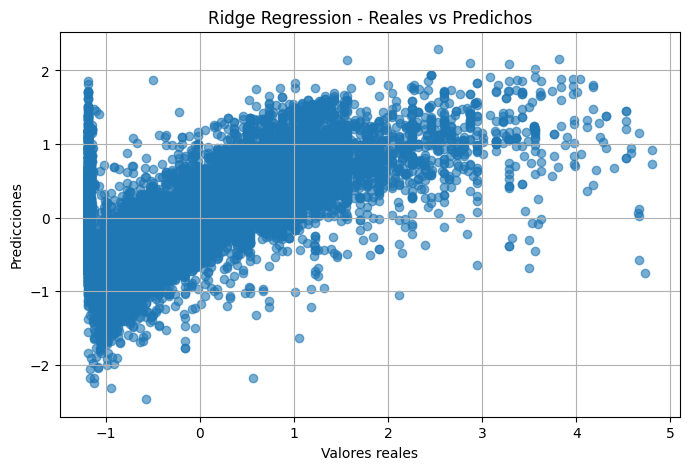

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Ridge Regression - Reales vs Predichos")
plt.grid(True)
plt.show()